<a href="https://colab.research.google.com/github/Payal2000/Customer-Segmentation-and-Clustering/blob/main/Customer_Segmenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

- Understanding the Target Customers for the marketing team to plan a strategy.

- We want to identify the most important shopping groups based on income, age, the mall shopping score.
- We would also want the ideal number of groups with a label for each.

# **Objective Market Segmentation**

- Divide the mall target market into approachable groups.
- Creating a subsets of market based on demographics behavioral criteria to better understand the target for marketing activities.


# **Our Approach**
1. Perform EDA ( Exploratoy Data Analysis )
2. Use KMEANS Clustering Algorithms to create segments
3. Use Summary Statistics on the clusters
4. Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Plotting
from sklearn.cluster import KMeans #Clustering
import seaborn as sns #Visualtization
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_url = "https://raw.githubusercontent.com/Payal2000/Customer-Segmentation-and-Clustering/main/data.csv"
data = pd.read_csv(file_url)


In [3]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## **Univariate Analysis**

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### **Key statistical metrics**

- Count: There are 200 entries for CustomerID, Age, Annual Income (k$), and Spending Score (1-100), showing that the data is complete with no missing values.
- Mean ( Average value of each variable):
CustomerID: The mean is **100.5**, which is the midpoint ID given the range from 1 to 200.

- Age: The average age of the customers is approximately **38.85** years.

- Annual Income (k): The average annual income of customers is around **$60,560**.

- Spending Score (1-100): The average spending score, which indicates how much they spend (based on specific criteria), is **50.2**.

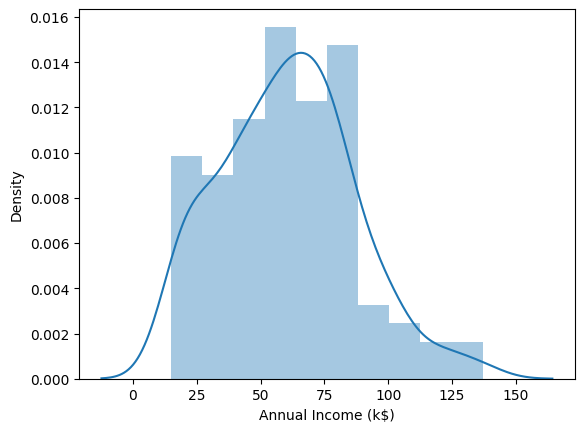

In [5]:
sns.distplot(data['Annual Income (k$)']);

### **Explanation:**


 - The x-axis represents the annual income of the customers in thousands of dollars. It ranges from 0 to approximately 150 k$.
Y-Axis (Density):

 - The y-axis represents the density, which indicates the **relative frequency** of data points at each income level.
 - Histogram Bars:
 The bars represent the frequency of customers falling into different income ranges. Taller bars indicate more customers in that income bracket.
 - Density Curve:The smooth curve over the histogram is a density plot that estimates the probability density function of the annual income distribution. It helps visualize the underlying distribution of the data in a continuous manner.


### **Key Observations:**

- **Peak Income Range**:
The highest density occurs around the 50-75 k range, suggesting that most customers have an annual income within this bracket.
- **Right Skewed Distribution:**
The curve shows a right skew (long tail towards the right), indicating that there are fewer customers with very high incomes (above 100 k$). Most incomes are concentrated in the lower to mid-range values.
- **Income Variability:** There is significant variability in income, with some customers earning below 25 k and others exceeding 125 k. However, the bulk of the population falls within the 50-75 k range.

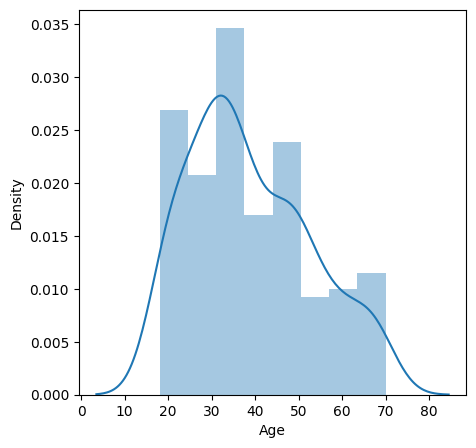

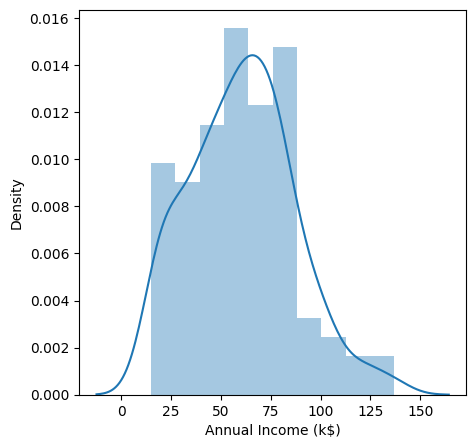

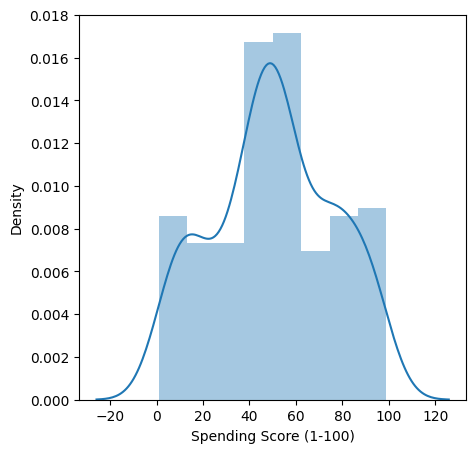

In [6]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure(figsize=(5,5))
  sns.distplot(data[i])


1. **Annual Income Density Plot:**
- X-Axis (Annual Income (k)): Shows the range of annual incomes in thousands of dollars.
- Y-Axis (Density): Indicates the density, or relative frequency, of customers at each income level.

- **Key Observations:**
The plot shows a peak around the 50-75 k range, indicating that most customers have an annual income within this range.
The distribution is right-skewed, meaning there are fewer high-income customers compared to lower-income ones.
A small number of customers earn significantly more than 100 k$, but this is relatively rare.


2. **Age Density Plot:**
- X-Axis (Age): Shows the age distribution of the customers.
- Y-Axis (Density): Represents the density, or frequency, of different age groups.

- **Key Observations:**
The peak is around 30-40 years old, indicating that most customers are in this age range.
The distribution has multiple peaks, suggesting distinct age groups (around 20s, 40s, and 60s).
The density decreases as age increases beyond 50, indicating fewer older customers.

3. **Spending Score Density Plot:**
- X-Axis (Spending Score (1-100)): Represents the spending score, a metric from 1 to 100 reflecting customer spending behavior.
- Y-Axis (Density): Indicates the density or frequency of spending scores.
- **Key Observations:**
The distribution is relatively symmetric and bell-shaped, with a peak around the 50-60 range, indicating a balanced distribution of spending behavior.
The plot shows a balanced mix of customers with low, moderate, and high spending scores.
Spending scores are evenly distributed, suggesting varied spending habits across the customer base.

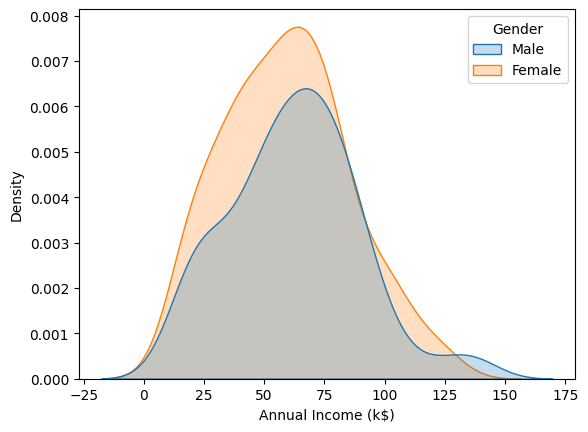

In [7]:
sns.kdeplot(x=data['Annual Income (k$)'],shade = True, hue = data['Gender']);

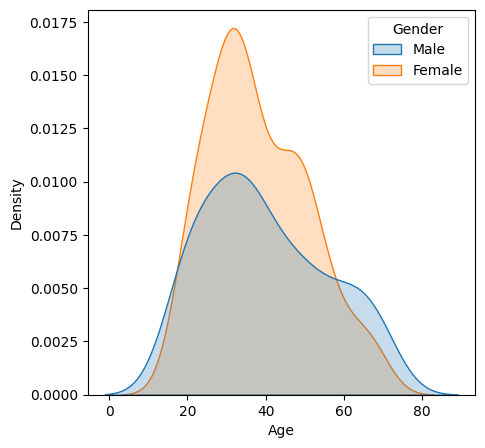

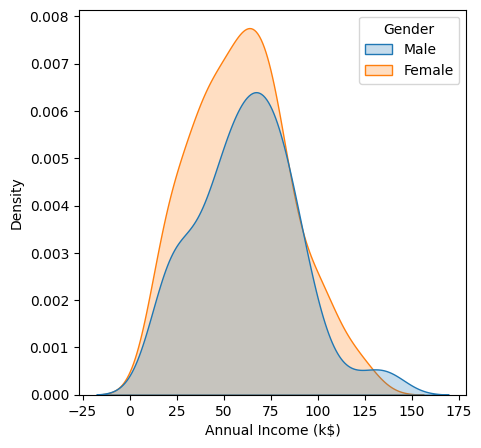

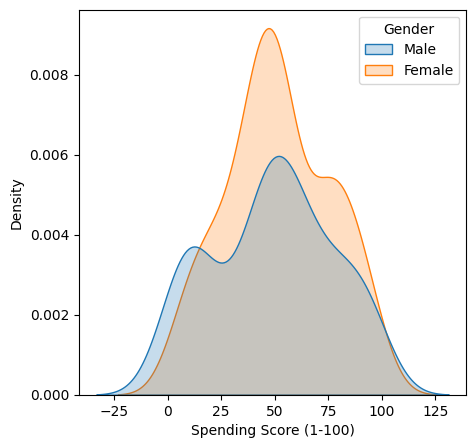

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure(figsize=(5,5))
  sns.kdeplot(x=data[i],shade = True, hue = data['Gender']);


**1.** **Age Density Plot by Gender:**
- X-Axis (Age): Shows the age of customers.
- Y-Axis (Density): Represents the relative frequency of customers at each age.

- Color Representation:
 - Blue Curve: Male customers.
 - Orange Curve: Female customers.

- **Key Observations:**
The peak for females is slightly higher around the 30-40 age range, indicating a higher concentration of female customers in this age group compared to males.
Males and females have a similar age distribution, but the density suggests that there are slightly more females in the younger age groups (20s to 40s).
Both curves taper off as age increases, indicating fewer older customers, with a slightly higher density of older males.

2.**Annual Income Density Plot by Gender:**
- X-Axis (Annual Income (k$)): Represents the annual income of customers in thousands of dollars.

- Y-Axis (Density): Indicates the relative frequency of each income level.

- Color Representation:

 - Blue Curve: Male customers.
 - Orange Curve: Female customers.

- Key Observations: Both males and females have similar income distributions with peaks around the 50-75 k$ range.
Females have a slightly higher density in the lower to middle income range (40-70 k), indicating a higher concentration of females in this income bracket.
The distribution for males is slightly more spread out towards higher income levels, suggesting that males are slightly more represented in higher income brackets.


**3.Spending Score Density Plot by Gender:**
- X-Axis (Spending Score (1-100)): Represents the spending behavior of customers on a scale of 1 to 100.

- Y-Axis (Density): Shows the frequency of spending scores.

- Color Representation:

 - Blue Curve: Male customers.
 - Orange Curve: Female customers.

- **Key Observations:** The distribution of spending scores is roughly symmetric for both genders, with a peak around the mid-range (40-60).
Females generally have a slightly higher density around the average spending score, indicating that a slightly larger proportion of female customers fall into the moderate spending range.
Males have a more uniform distribution with slight variations, while females tend to have a more pronounced peak, suggesting more consistent spending behavior among females.


## **Boxplot**



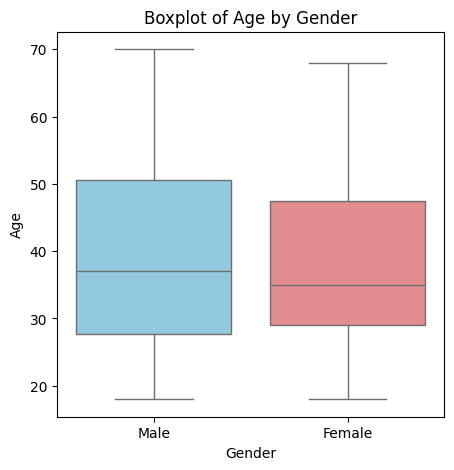

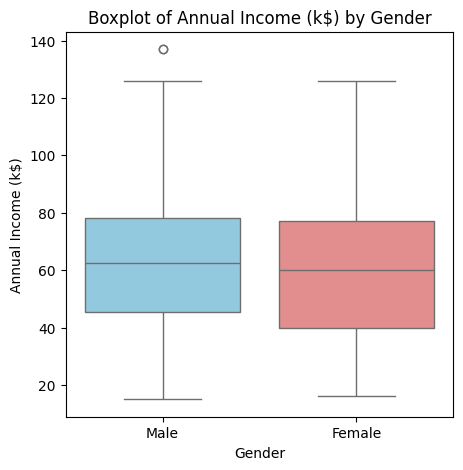

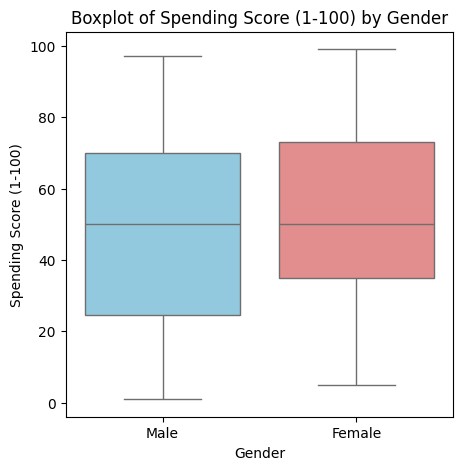

In [14]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=data, x='Gender', y= data[i], palette={'Male': 'skyblue', 'Female': 'lightcoral'})
    plt.title(f'Boxplot of {i} by Gender')
    plt.show()


**1. Boxplot of Age by Gender:**
- X-Axis (Gender): Represents the gender categories, Male and Female.
- Y-Axis (Age): Represents the age of the customers.
- Key Observations:
The median age (middle line in the box) is similar for both males and females, around 40 years.
Both genders have a similar interquartile range (IQR), indicating that the middle 50% of ages are comparable.
The age range is slightly broader for males, extending up to 70, while females reach around 65.
There are no significant outliers, indicating a consistent age distribution for both genders.

**2. Boxplot of Annual Income (k) by Gender:**

- X-Axis (Gender): Represents the gender categories, Male and Female.
- Y-Axis (Annual Income (k)): Shows the annual income in thousands of dollars.

- Key Observations:
The median income is similar for both genders, around 60-70 k.
Both genders have a similar IQR, suggesting that most customers have incomes within a similar range.
There is an outlier in the male group, indicating a male customer with significantly higher income compared to the rest.
The overall income range is comparable for both genders, with maximum incomes reaching around 140 k.

**3. Boxplot of Spending Score (1-100) by Gender:**
- X-Axis (Gender): Represents the gender categories, Male and Female.
- Y-Axis (Spending Score (1-100)): Represents the spending score, which measures spending behavior on a scale of 1 to 100.

- Key Observations:
The median spending score is similar for both genders, around 50, suggesting similar average spending behavior.
The IQR shows that the majority of spending scores for both genders fall within a broad range, indicating varied spending habits.
The range of spending scores is wide and consistent for both genders, extending from near 0 to 100.
There are no significant outliers, showing a balanced spread of spending scores between males and females.
